In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
data=pd.read_csv("Social_Network_Ads copy.csv")

In [3]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x=data.iloc[:,:-1]
y=data["Purchased"]

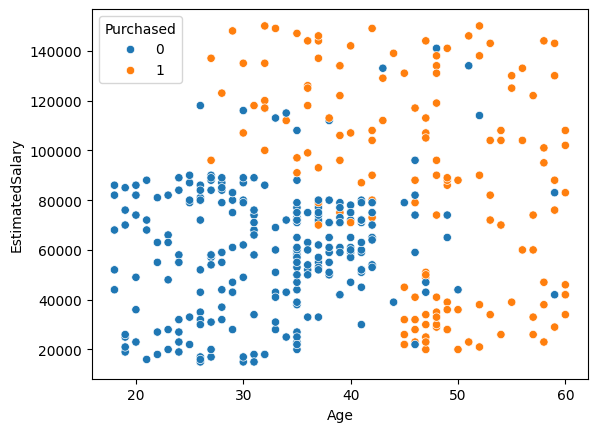

In [6]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=data,hue="Purchased")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [8]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
kn.score(x_train,y_train)*100

90.9375

In [16]:
kn.score(x_test,y_test)*100

92.5

In [39]:
// form this we get the value of n_neighbours value by using comcept of unver fitting
// and over fitting.

for i in range(1,30):
    kn1=KNeighborsClassifier(n_neighbors=i)
    kn1.fit(x_train,y_train)
    print((i,kn1.score(x_train,y_train)*100,kn1.score(x_test,y_test)*100))


(1, 99.6875, 85.0)
(2, 91.5625, 86.25)
(3, 92.5, 92.5)
(4, 91.5625, 92.5)
(5, 90.9375, 92.5)
(6, 90.9375, 90.0)
(7, 91.875, 93.75)
(8, 90.625, 92.5)
(9, 91.25, 93.75)
(10, 90.625, 92.5)
(11, 90.9375, 92.5)
(12, 91.25, 92.5)
(13, 91.5625, 92.5)
(14, 90.625, 92.5)
(15, 90.625, 92.5)
(16, 90.0, 92.5)
(17, 90.3125, 92.5)
(18, 90.0, 92.5)
(19, 90.9375, 92.5)
(20, 90.0, 93.75)
(21, 90.3125, 92.5)
(22, 90.0, 93.75)
(23, 90.3125, 93.75)
(24, 89.375, 93.75)
(25, 90.0, 93.75)
(26, 89.375, 93.75)
(27, 89.375, 92.5)
(28, 88.75, 93.75)
(29, 88.75, 93.75)


In [40]:
kn.predict([[-1.781797,-1.490046]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


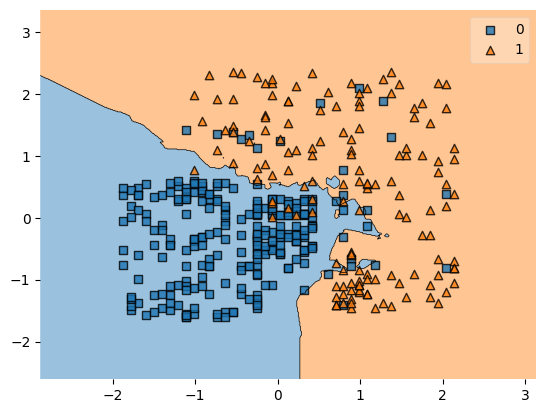

In [46]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=kn)
plt.show()